In [1]:
import os
from PIL import Image

In [2]:
original_data_dir = "/Users/johannes/Code/Work/Exports/NanoStore_Full_YOLO"
resized_dir = "/Users/johannes/Code/labelstudio/NanoStore_Full_YOLO_resized_v8"
output_dir = "/Users/johannes/Code/labelstudio/NanoStore_Full_YOLOv8_200"

image_size=(200, 200)

# data_format = 'yolov6-v3.0'
# data_format = 'yolov7'
data_format = 'yolov8'

### yolov6-v3.0 + yolov7

In [3]:
def resize_and_adjust_annotations_yolov7(image_path, annotation_path, output_dir, image_size=(640, 640)):
  """
  Resizes an image and adjusts its annotations to match the new size.

  Args:
    image_path: Path to the image file.
    annotation_path: Path to the annotation file.
    output_dir: Path to the output directory.
    image_size: Target image size for resizing.
  """
  img = Image.open(image_path)
  # img_width, img_height = img.size

  with open(annotation_path, "r") as f:
    annotations = f.readlines()

  new_annotations = []
  for line in annotations:
    class_id, x_center, y_center, width, height = map(float, line.split())
    
    # Adjust coordinates to fit new image size
    # x_center *= image_size[0] / img_width
    # y_center *= image_size[1] / img_height
    # width *= image_size[0] / img_width
    # height *= image_size[1] / img_height

    new_annotations.append(f"{class_id} {x_center:.12f} {y_center:.12f} {width:.12f} {height:.12f}\n")

  resized_img = img.resize(image_size)
  resized_img.save(os.path.join(output_dir, "images", os.path.basename(image_path)))

  with open(os.path.join(output_dir, "labels", os.path.basename(annotation_path)), "w") as f:
    f.writelines(new_annotations)

In [4]:
if data_format == 'yolov7' or data_format == 'yolov6-v3.0':
  # Create output directories if they don't exist
  os.makedirs(os.path.join(resized_dir, "images"), exist_ok=True)  # Create images directory
  os.makedirs(os.path.join(resized_dir, "labels"), exist_ok=True)  # Create labels directory

  # Iterate through images, filtering on supported formats
  images_dir = os.path.join(original_data_dir, "images")
  supported_formats = (".png", ".jpg")  # Add other supported formats if needed
  for image_filename in os.listdir(images_dir):
    if image_filename.lower().endswith(supported_formats):
      image_path = os.path.join(images_dir, image_filename)
      annotation_path = os.path.join(original_data_dir, "labels", os.path.splitext(image_filename)[0] + ".txt")
      resize_and_adjust_annotations_yolov7(image_path, annotation_path, resized_dir, image_size)

### yolov8

In [5]:
def resize_and_adjust_annotations_yolov8(image_path, annotation_path, output_dir, image_size=(640, 640)):
  """
  Resizes an image and adjusts its annotations to match the new size.

  Args:
    image_path: Path to the image file.
    annotation_path: Path to the annotation file.
    output_dir: Path to the output directory.
    image_size: Target image size for resizing.
  """
  img = Image.open(image_path)
  # img_width, img_height = img.size

  with open(annotation_path, "r") as f:
    annotations = f.readlines()
    
  resized_img = img.resize(image_size)
  resized_img.save(os.path.join(output_dir, "images", os.path.basename(image_path)))

  with open(os.path.join(output_dir, "labels", os.path.basename(annotation_path)), "w") as f:
    f.writelines(annotations)

In [6]:
if data_format == 'yolov8':
    # Create output directories if they don't exist
    os.makedirs(os.path.join(resized_dir, "images"), exist_ok=True)  # Create images directory
    os.makedirs(os.path.join(resized_dir, "labels"), exist_ok=True)  # Create labels directory

    # Iterate through images, filtering on supported formats
    images_dir = os.path.join(original_data_dir, "images")
    supported_formats = (".png", ".jpg")  # Add other supported formats if needed
    for image_filename in os.listdir(images_dir):
        if image_filename.lower().endswith(supported_formats):
            image_path = os.path.join(images_dir, image_filename)
            annotation_path = os.path.join(original_data_dir, "labels", os.path.splitext(image_filename)[0] + ".txt")
            resize_and_adjust_annotations_yolov8(image_path, annotation_path, resized_dir, image_size=image_size)

### Check if annotations were converted correctly

In [7]:
# from PIL import Image
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# import numpy as np

### Make sure conversion was correct
### MANUALLY: Change to the very first image and label files)

In [8]:
# image inside new resized folder
image_path = "/Users/johannes/Code/labelstudio/NanoStore_Full_YOLO_resized_v8/images/0a3df008-173_0_115.png"
# corresponding label inside new resized folder
annotation_path = "/Users/johannes/Code/labelstudio/NanoStore_Full_YOLO_resized_v8/labels/0a3df008-173_0_115.txt"

person
trolley


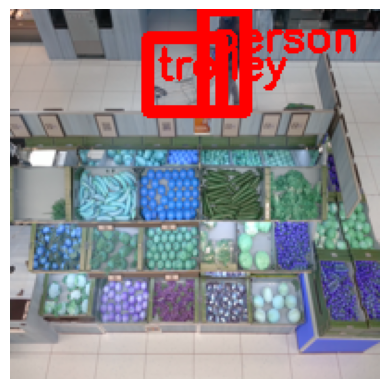

In [9]:
import cv2
import matplotlib.pyplot as plt

# Replace this with your logic to get class name based on class ID
def get_class_name(class_id):
  # Implement your class name mapping logic here
  # This is just a placeholder to illustrate the concept
  class_names = ["person", "trolley"]  # Example class names
  return class_names[int(class_id)]

def plot_yolov5_bboxes(image_path, annotations_path):
  """
  Plots bounding boxes from a YOLOv5 annotations file on an image with red color and class numbers.

  Args:
    image_path: Path to the image file.
    annotations_path: Path to the YOLOv5 annotations file (.txt).

  Returns:
    None.
  """

  # Load image
  image = cv2.imread(image_path)

  # Read annotations
  with open(annotations_path, 'r') as f:
    annotations = f.readlines()

  # Loop through each annotation
  for annotation in annotations:
    class_id, x_center, y_center, width, height = map(float, annotation.split())

    # Convert YOLOv5 format to normalized coordinates
    x_min = x_center - width / 2
    y_min = y_center - height / 2
    x_max = x_center + width / 2
    y_max = y_center + height / 2

    # Convert normalized coordinates to image coordinates
    width, height = image.shape[1], image.shape[0]
    x_min = int(x_min * width)
    y_min = int(y_min * height)
    x_max = int(x_max * width)
    y_max = int(y_max * height)

    # Draw bounding box with red color and thicker line (5 pixels)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 5)

    # Get class name from class ID (assuming you have a mapping somewhere)
    class_name = get_class_name(class_id)  # Replace with your class name retrieval logic
    print(class_name)

    # Add class number as text inside the box
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.75 # was 10
    font_color = (255, 0, 0)
    text_thickness = 2 # was 20
    text_size = cv2.getTextSize(class_name, font, font_scale, text_thickness)[0]
    text_x = x_min + 5  # Add a small margin to the left
    text_y = y_min + text_size[1] + 5  # Add a small margin above
    cv2.putText(image, class_name, (text_x, text_y), font, font_scale, font_color, text_thickness)

  # Display image with bounding boxes
  plt.imshow(image)
  plt.axis('off')
  plt.show()

plot_yolov5_bboxes(image_path, annotation_path)

### Split Data

### yolov7 + yolov8

In [10]:
import os
import shutil

def split_data(data_dir, output_dir, valid_ratio=0.2, test_ratio=0.2):
  """
  Splits a data directory containing image and labels folders into train, test, and valid folders with separate image and label subdirectories.
  """

  # get image_files and label_files from original folder
  original_images_dir = os.path.join(data_dir, "images")
  original_labels_dir = os.path.join(data_dir, "labels")
  image_files = [f for f in os.listdir(original_images_dir)] # if f.endswith((".jpg", ".png", ".jpeg"))]
  # label_files = [f for f in os.listdir(original_labels_dir)] # if f.endswith((".txt",))]

  # create destination folder structure (e.g. output/train/images + output/train/labels)
  os.makedirs(output_dir, exist_ok=True)
  train_dir = os.path.join(output_dir, "train")
  test_dir = os.path.join(output_dir, "test")
  valid_dir = os.path.join(output_dir, "valid")
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)
  os.makedirs(valid_dir, exist_ok=True)

  # create split
  ## test
  num_total = len(image_files)
  num_test = int(num_total * test_ratio)
  test_images = image_files[:num_test]
  # test_labels = label_files[:num_test]
  remaining_images = image_files[num_test:]
  # remaining_labels = label_files[num_test:]

  ## valid
  num_valid = int(len(remaining_images) * valid_ratio)
  valid_images = remaining_images[:num_valid]
  # valid_labels = remaining_labels[:num_valid]
  
  ## train
  train_images = remaining_images[num_valid:]
  # train_labels = remaining_labels[num_valid:]

  # Move files to respective directories
  splits = ["train", "valid", "test"]
  for split_idx in [0, 1, 2]:
    split_name = splits[split_idx]
    if split_idx == 0:
      images_list = train_images
      # labels_list = train_labels
    elif split_idx == 1:
      images_list = valid_images
      # labels_list = valid_labels
    elif split_idx == 2:
      images_list = test_images
      # labels_list = test_labels

    split_dir = os.path.join(output_dir, split_name)
    images_dir = os.path.join(split_dir, "images")
    labels_dir = os.path.join(split_dir, "labels")

    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    # for image_file, label_file in zip(images_list, labels_list):
    for image_file in images_list:
      image_path = os.path.join(original_images_dir, image_file)
      label_path = os.path.join(original_labels_dir, os.path.splitext(image_file)[0] + ".txt")

      shutil.copy2(image_path, images_dir)
      shutil.copy2(label_path, labels_dir)

  print(f"Data split: Train: {len(train_images)}, Valid: {len(valid_images)}, Test: {len(test_images)}")

In [11]:
if data_format == 'yolov7' or data_format == 'yolov8':
    valid_ratio = 0.2
    test_ratio = 0.1

    split_data(resized_dir, output_dir, valid_ratio, test_ratio)

Data split: Train: 346, Valid: 86, Test: 48


### yolov6-v3.0

In [12]:
import os
import shutil

def split_data(data_dir, output_dir, valid_ratio=0.2, test_ratio=0.2):
  """
  Splits a data directory containing image and labels folders into train, test, and valid folders within images and labels subdirectories.
  """

  # get image_files from original folder
  original_images_dir = os.path.join(data_dir, "images")
  original_labels_dir = os.path.join(data_dir, "labels")
  image_files = [f for f in os.listdir(original_images_dir)]  # if f.endswith((".jpg", ".png", ".jpeg"))]

  # create destination folder structure (e.g., output/images/test+train+valid)
  os.makedirs(output_dir, exist_ok=True)
  images_dir = os.path.join(output_dir, "images")
  labels_dir = os.path.join(output_dir, "labels")
  os.makedirs(images_dir, exist_ok=True)
  os.makedirs(labels_dir, exist_ok=True)

  ## create train, valid, test folders inside output/images and output/labels
  splits = ["train", "valid", "test"]
  for split_name in splits:
    split_images_dir = os.path.join(images_dir, split_name)
    split_labels_dir = os.path.join(labels_dir, split_name)
    os.makedirs(split_images_dir, exist_ok=True)
    os.makedirs(split_labels_dir, exist_ok=True)

  # create split
  ## test
  num_total = len(image_files)
  num_test = int(num_total * test_ratio)
  test_images = image_files[:num_test]
  remaining_images = image_files[num_test:]

  ## valid
  num_valid = int(len(remaining_images) * valid_ratio)
  valid_images = remaining_images[:num_valid]
  train_images = remaining_images[num_valid:]

  # Move files to respective directories
  for image_file in image_files:
    image_path = os.path.join(original_images_dir, image_file)
    label_path = os.path.join(original_labels_dir, os.path.splitext(image_file)[0] + ".txt")

    if image_file in train_images:
      split_dir = "train"
    elif image_file in valid_images:
      split_dir = "valid"
    else:
      split_dir = "test"

    split_images_dir = os.path.join(images_dir, split_dir)
    split_labels_dir = os.path.join(labels_dir, split_dir)

    shutil.copy2(image_path, split_images_dir)
    shutil.copy2(label_path, split_labels_dir)

  print(f"Data split: Train: {len(train_images)}, Valid: {len(valid_images)}, Test: {len(test_images)}")

In [13]:
if data_format == 'yolov6-v3.0':
    valid_ratio = 0.2
    test_ratio = 0.1

    split_data(resized_dir, output_dir, valid_ratio, test_ratio)

### Write YOLOv8 YAML File

In [14]:
import yaml

### yolov7 + yolov8

In [15]:
if data_format == 'yolov7' or data_format == 'yolov8':
    classes_file = os.path.join(original_data_dir, "classes.txt")
    file_path = os.path.join(output_dir, "data.yaml")

    with open(classes_file, "r") as f:
        classes = [line.strip() for line in f]

    data = {
        "names": classes,
        "nc": len(classes),
        "test": output_dir + "/test/images",
        "train": output_dir + "/train/images",
        "val": output_dir + "/valid/images",
    }

    with open(file_path, "w") as file:
        yaml.dump(data, file)

### yolov6-v3.0

In [16]:
if data_format == 'yolov6-v3.0':
    classes_file = os.path.join(original_data_dir, "classes.txt")
    file_path = os.path.join(output_dir, "data.yaml")
    output_name = output_dir.split("/")[-1]

    with open(classes_file, "r") as f:
        classes = [line.strip() for line in f]

    data = {
        "names": classes,
        "nc": len(classes),
        "test": output_dir + "/images/test",
        "train": output_dir + "/images/train",
        "val": output_dir + "/images/valid",
    }

    with open(file_path, "w") as file:
        yaml.dump(data, file)